In [2]:
#pip install xgboost

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from functions.Random_forest import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Lendo o dataset

In [2]:
df = pd.read_csv(r'C:\Users\gabri\Desktop\Git - Tcc\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

Utilizando a class random forest para fazer o pré processamento

In [3]:
list_features = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
                'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS','SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE',
                'SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION','DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY','DISEASE_IMMUNOSUPPRESSION',
                'DISEASE_TABAGIST','DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino']

In [4]:
random_forest = Random_forest(df)
random_forest.run_graves()

df = random_forest.df
df = df[list_features]
df

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.460870,0,1
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.747826,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.573913,0,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.591304,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.669565,0,1
36431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.643478,0,1
36432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.643478,0,1
36433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.634783,1,0


Definindo X de treino e teste e y de treino e teste

In [5]:
X = df.drop("death",axis=1)
y = df['death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Criando um função para executar o modelo com k-fold e com repetição

In [35]:
def XGBoost_model (X_train, y_train):
    param_grid = {
        #"max_depth": [3, 5, 7],
        "learning_rate": [0.1, 0.2],
        #"gamma": [0.25, 1],
        "reg_lambda": [0, 1, 10],
        "scale_pos_weight": [1, 3, 5],
        #"subsample": [0.8],
        "colsample_bytree": [0.5, 0.9] }

    # Init classifier
    xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

    # Init Grid Search
    grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=cv, scoring="roc_auc")

    # Fit 
    _ = grid_cv.fit(X_train, y_train)

    print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score']}")
    print(f"std_test_score: {grid_cv.cv_results_['std_test_score']}")
    print('')
    print(f"mean_test_score.mean: {grid_cv.cv_results_['mean_test_score'].mean()}")
    print(f"std_test_score.mean: {grid_cv.cv_results_['std_test_score'].mean()}")
    print('')
    print(f'best_score: {grid_cv.best_score_}')
    print(f'best_params_: {grid_cv.best_params_}')

In [36]:
XGBoost_model(X_train, y_train)

mean_test_score: [0.78859231 0.7887831  0.78872942 0.78861284 0.78893426 0.78884122
 0.78841129 0.78895737 0.78892073 0.78896399 0.78855684 0.7881124
 0.78937243 0.7890984  0.78874417 0.78986379 0.78968313 0.78964967
 0.78640081 0.78517777 0.78436683 0.7875738  0.78655055 0.78580961
 0.78925117 0.78856154 0.78834551 0.78879084 0.78875755 0.78880938
 0.78909493 0.78919338 0.78920231 0.78946348 0.78941728 0.78956034
 0.78561933 0.7848744  0.78464617 0.78681123 0.78618218 0.78594565
 0.78874294 0.7883187  0.78794143 0.77983094 0.77728451 0.77641382
 0.78233312 0.78016038 0.77902596 0.78637131 0.7845911  0.78411409
 0.78860393 0.78878938 0.78873738 0.78862973 0.78891061 0.78886841
 0.78838395 0.78896323 0.78893302 0.78899618 0.78854628 0.78825421
 0.78950645 0.78916882 0.78874047 0.78984601 0.78980869 0.78971422
 0.78693361 0.78544286 0.78456264 0.78788917 0.78679747 0.78604535
 0.78947847 0.78865334 0.78842221 0.7888768  0.78874072 0.78883287
 0.78918455 0.78926705 0.78917467 0.7894113  0

In [37]:
print(f"mean_test_score.mean: {grid_cv.cv_results_['mean_test_score'].mean()}")
print(f"std_test_score.mean: {grid_cv.cv_results_['std_test_score'].mean()}")

mean_test_score: 0.785701065318088
mean_test_score: 0.004677073013781236


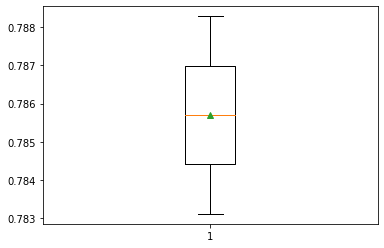

In [38]:
from matplotlib import pyplot

pyplot.boxplot(grid_cv.cv_results_['mean_test_score'], showmeans=True)
pyplot.show()

In [33]:
'''
param_grid = {
    #"max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.2],
    #"gamma": [0.25, 1],
    #"reg_lambda": [0, 1, 10],
    #"scale_pos_weight": [1, 3, 5],
    #"subsample": [0.8],
    "colsample_bytree": [0.5, 0.9]}

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=cv, scoring="roc_auc")

# Fit 
_ = grid_cv.fit(X_train, y_train)

print(grid_cv.cv_results_['mean_test_score'])
print(grid_cv.cv_results_['std_test_score'])

grid_cv.best_score_

grid_cv.best_params_
'''

'\nparam_grid = {\n    #"max_depth": [3, 5, 7],\n    "learning_rate": [0.1, 0.2],\n    #"gamma": [0.25, 1],\n    #"reg_lambda": [0, 1, 10],\n    #"scale_pos_weight": [1, 3, 5],\n    #"subsample": [0.8],\n    "colsample_bytree": [0.5, 0.9]}\n\n# Init classifier\nxgb_cl = xgb.XGBClassifier(objective="binary:logistic")\n\n# prepare the cross-validation procedure\ncv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)\n\n# Init Grid Search\ngrid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=cv, scoring="roc_auc")\n\n# Fit \n_ = grid_cv.fit(X_train, y_train)\n\nprint(grid_cv.cv_results_[\'mean_test_score\'])\nprint(grid_cv.cv_results_[\'std_test_score\'])\n\ngrid_cv.best_score_\n\ngrid_cv.best_params_\n'

Testando para os melhores parametros

In [14]:
# parametrizando o modelo final
final_cl = xgb.XGBClassifier(
    **grid_cv.best_params_)

#treinando o modelo final
final_cl.fit(X_train, y_train)


preds = final_cl.predict(X_test)

accuracy_score(y_test, preds)

0.7697269109372856

## APLICANDO PARA PERIODO DE 6 MESES

In [59]:
periodo_1 = df[(df['data_notificacao'] > '2020-02-26') & (df['data_notificacao'] < '2020-08-31')]
periodo_2 = df[(df['data_notificacao'] > '2020-09-01') & (df['data_notificacao'] < '2021-02-28')]
periodo_3 = df[(df['data_notificacao'] > '2021-03-01') & (df['data_notificacao'] < '2021-08-31')]
periodo_4 = df[(df['data_notificacao'] > '2021-09-01') & (df['data_notificacao'] < '2022-02-28')]
periodo_5 = df[(df['data_notificacao'] > '2022-03-01') & (df['data_notificacao'] < '2022-06-13')]

#### Aplicando para o periodo 1

In [10]:
random_forest = Random_forest(periodo_1)
random_forest.run_graves()

df_p1 = random_forest.df
df_p1 = df_p1[list_features]
df_p1

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Ignorado,sexo_Masculino
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.486239,0,0,1
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.788991,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.605505,0,0,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.623853,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36273,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0.211009,1,0,0
36274,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.614679,0,0,1
36275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.623853,0,0,1
36276,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.752294,1,0,0


In [11]:
X = df_p1.drop("death",axis=1)
y = df_p1['death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1, 0.2],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5, 0.9],
}

In [13]:
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit 
_ = grid_cv.fit(X_train, y_train)

In [14]:
grid_cv.best_score_

0.8423959281264182

In [15]:
grid_cv.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

#### Aplicando periodo 2 - 6 meses

In [28]:
random_forest = Random_forest(periodo_2)
random_forest.run_graves()

df_p2 = random_forest.df
df_p2 = df_p2[list_features]
df_p2

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.736842,0,1
432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.166667,0,1
433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.798246,1,0
434,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.500000,0,1
436,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.736842,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36245,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.666667,1,0
36246,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.570175,1,0
36247,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.429825,0,1
36351,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0.798246,1,0


In [30]:
X = df_p2.drop("death",axis=1)
y = df_p2['death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit 
_ = grid_cv.fit(X_train, y_train)

In [33]:
grid_cv.best_score_

0.7731439034819259

In [34]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.25,
 'learning_rate': 0.05,
 'max_depth': 5,
 'reg_lambda': 10,
 'scale_pos_weight': 1,
 'subsample': 0.8}

#### Aplicando periodo 3 - 6 meses

In [60]:
random_forest = Random_forest(periodo_3)
random_forest.run_graves()

df_p3 = random_forest.df
df_p3 = df_p3[list_features]
df_p3

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
952,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.429825,0,1
953,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.315789,1,0
954,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.368421,1,0
955,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.394737,0,1
956,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.377193,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36364,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.622807,1,0
36366,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.508772,1,0
36371,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.403509,0,1
36372,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.622807,0,1


In [61]:
X = df_p3.drop("death",axis=1)
y = df_p3['death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit 
_ = grid_cv.fit(X_train, y_train)

In [63]:
grid_cv.best_score_

0.7854884915093626

In [64]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.25,
 'learning_rate': 0.05,
 'max_depth': 5,
 'reg_lambda': 10,
 'scale_pos_weight': 1,
 'subsample': 0.8}

## APLICANDO PARA PERIODO DE 3 MESES

In [42]:
periodo_1 = df[(df['data_notificacao'] > '2020-02-26') & (df['data_notificacao'] < '2020-05-31')]
periodo_2 = df[(df['data_notificacao'] > '2020-06-01') & (df['data_notificacao'] < '2020-08-31')]
periodo_3 = df[(df['data_notificacao'] > '2020-09-01') & (df['data_notificacao'] < '2020-11-30')]
periodo_4 = df[(df['data_notificacao'] > '2020-12-01') & (df['data_notificacao'] < '2021-02-28')]
periodo_5 = df[(df['data_notificacao'] > '2021-03-01') & (df['data_notificacao'] < '2021-05-31')]
periodo_6 = df[(df['data_notificacao'] > '2021-06-01') & (df['data_notificacao'] < '2021-08-31')]
periodo_7 = df[(df['data_notificacao'] > '2021-09-01') & (df['data_notificacao'] < '2021-11-30')]
periodo_8 = df[(df['data_notificacao'] > '2021-12-01') & (df['data_notificacao'] < '2022-02-28')]
periodo_9 = df[(df['data_notificacao'] > '2022-03-01') & (df['data_notificacao'] < '2025-05-31')]
periodo_10 = df[(df['data_notificacao'] > '2022-06-01') & (df['data_notificacao'] < '2022-06-13')]

#### Aplicando para perido 1 - 3 meses

In [43]:
random_forest = Random_forest(periodo_1)
random_forest.run_graves()

df_p1 = random_forest.df
df_p1 = df_p1[list_features]
df_p1

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.486239,0,1
24,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.633028,0,1
25,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.642202,0,1
26,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.596330,0,1
27,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.467890,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36271,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.532110,1,0
36272,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.871560,1,0
36274,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.614679,0,1
36275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.623853,0,1


In [44]:
X = df_p1.drop("death",axis=1)
y = df_p1['death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1, 0.2],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5, 0.9],
}

In [46]:
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit 
_ = grid_cv.fit(X_train, y_train)

In [47]:
grid_cv.best_score_

0.8809538989812508

In [48]:
grid_cv.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

#### Aplicando periodo 2 - 3 meses

In [49]:
random_forest = Random_forest(periodo_2)
random_forest.run_graves()

df_p2 = random_forest.df
df_p2 = df_p2[list_features]
df_p2

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.803738,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.635514,0,1
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.869159,0,1
6,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.626168,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36251,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.644860,1,0
36252,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.654206,1,0
36261,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.747664,0,1
36270,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.766355,1,0


In [50]:
X = df_p2.drop("death",axis=1)
y = df_p2['death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit 
_ = grid_cv.fit(X_train, y_train)

In [52]:
grid_cv.best_score_

0.7948287930457768

In [53]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 1,
 'scale_pos_weight': 3,
 'subsample': 0.8}

#### Aplicando periodo 3 - 3 meses

In [54]:
random_forest = Random_forest(periodo_3)
random_forest.run_graves()

df_p3 = random_forest.df
df_p3 = df_p3[list_features]
df_p3

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.807692,0,1
432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182692,0,1
433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.875000,1,0
434,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.548077,0,1
436,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.807692,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36168,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0.576923,1,0
36169,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.586538,0,1
36235,1,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0.605769,0,1
36236,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0.519231,0,1


In [55]:
X = df_p3.drop("death",axis=1)
y = df_p3['death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit 
_ = grid_cv.fit(X_train, y_train)

In [57]:
grid_cv.best_score_

0.773193858578367

In [58]:
grid_cv.best_params_

{'colsample_bytree': 0.9,
 'gamma': 1,
 'learning_rate': 0.05,
 'max_depth': 3,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.8}